<a href="https://www.kaggle.com/code/aryabs/tcs-hr-dashbord?scriptVersionId=121429807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-test-data-set/HR_comma_sep.csv


# **Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



# **Loading the Dataset**

In [3]:
#loading the data
hr_data= pd.read_csv('/kaggle/input/hr-test-data-set/HR_comma_sep.csv')


In [4]:
#dataset informations
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# No of row and Columns
hr_data.shape

(14999, 10)

In [6]:
#first five rows of the dataset
target = hr_data.pop('salary')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2,157,3,0,1,0,sales
1,0.80,0.86,5,262,6,0,1,0,sales
2,0.11,0.88,7,272,4,0,1,0,sales
3,0.72,0.87,5,223,5,0,1,0,sales
4,0.37,0.52,2,159,3,0,1,0,sales


In [7]:
#last five rows of the dataset

hr_data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
14994,0.40,0.57,2,151,3,0,1,0,support
14995,0.37,0.48,2,160,3,0,1,0,support
14996,0.37,0.53,2,143,3,0,1,0,support
14997,0.11,0.96,6,280,4,0,1,0,support
14998,0.37,0.52,2,158,3,0,1,0,support


In [8]:
#Name of columns
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department'],
      dtype='object')

**CLEANING THE DATASET**

In [9]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [11]:
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
dtype: int64

In [12]:
pd.DataFrame(target).isna().sum()

salary    0
dtype: int64

In [13]:
col_names = ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'left','promotion_last_5years', 'Department']


for col in col_names:
    
    print(hr_data[col].value_counts())  

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: average_montly_hours, Length: 215, dtype: int64
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64
0    12830
1     2169
Name: Work_accident, dtype: int64
0    11428
1     3571
Name: left, dtype: int64
0    14680
1      319
Name: promotion_last_5years, dtype: int64
sales          4140
technical      2720
support        2229
IT           

# **Exploratory Data Analysis**

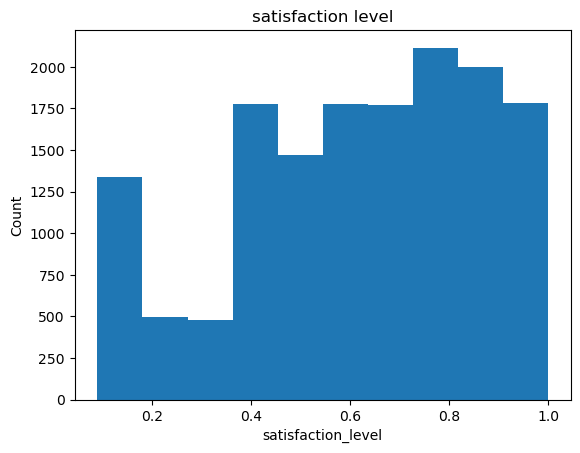

In [14]:
#checking satisfaction_level

plt.hist(hr_data['satisfaction_level'])
plt.xlabel('satisfaction_level')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (5,5)
plt.title('satisfaction level')
plt.show()

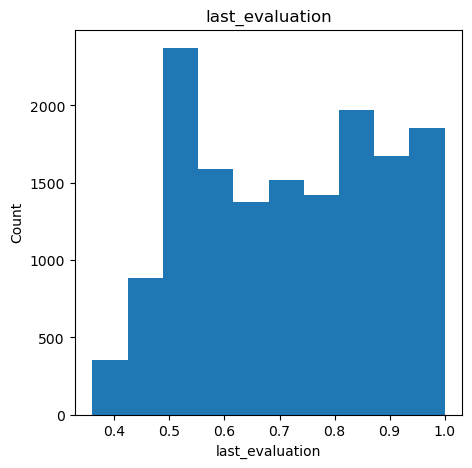

In [15]:
#checking last_evaluation

plt.hist(hr_data['last_evaluation'])
plt.xlabel('last_evaluation')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (5,5)
plt.title('last_evaluation')
plt.show()

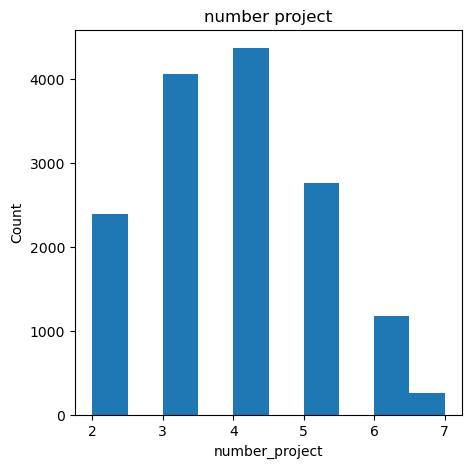

In [16]:
#checking number_project

plt.hist(hr_data['number_project'])
plt.xlabel('number_project')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (5,5)
plt.title('number project')
plt.show()

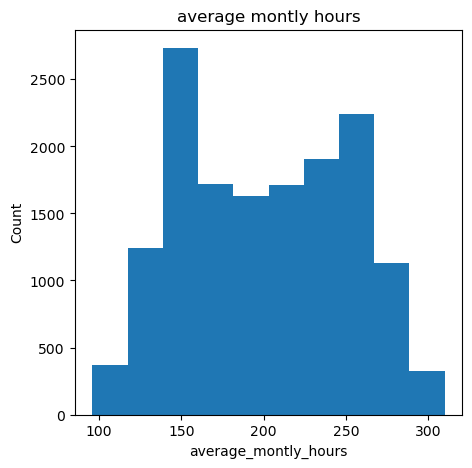

In [17]:
#checking average_montly_hours

plt.hist(hr_data['average_montly_hours'])
plt.xlabel('average_montly_hours')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (5,5)
plt.title('average montly hours')
plt.show()

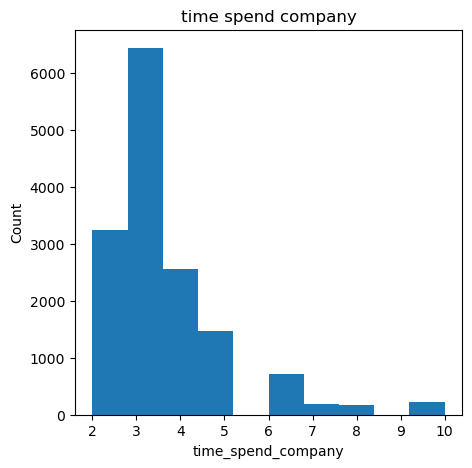

In [18]:
#checking time_spend_company

plt.hist(hr_data['time_spend_company'])
plt.xlabel('time_spend_company')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (5,5)
plt.title('time spend company')
plt.show()

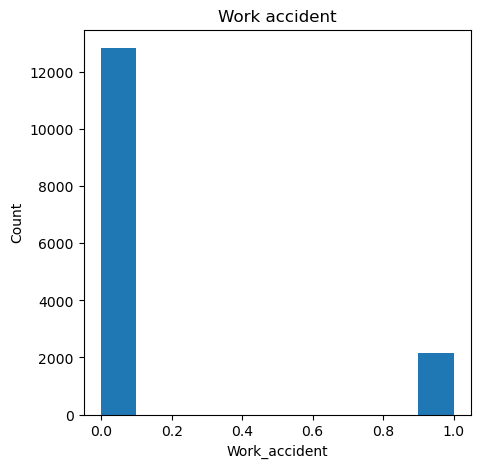

In [19]:
#checking Work_accident

plt.hist(hr_data['Work_accident'])
plt.xlabel('Work_accident')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (5,5)
plt.title('Work accident')
plt.show()

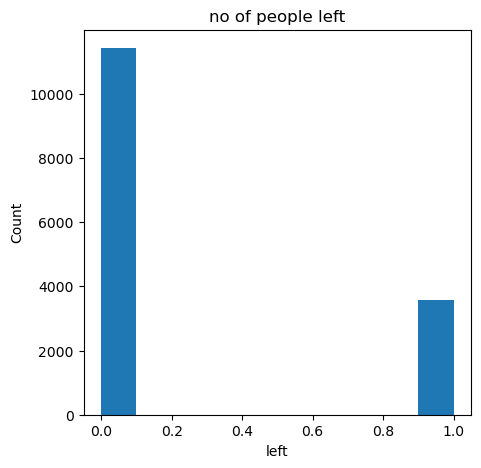

In [20]:
#checking left

plt.hist(hr_data['left'])
plt.xlabel('left')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (5,5)
plt.title('no of people left')
plt.show()

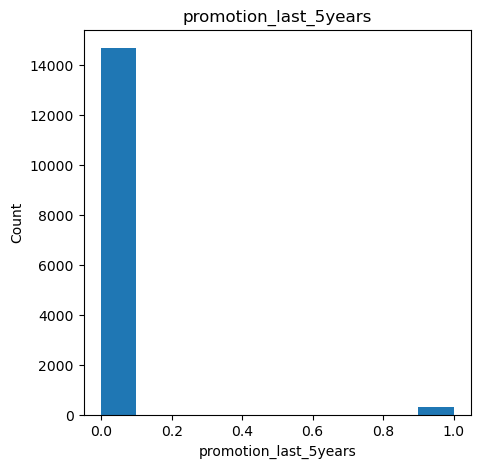

In [21]:
#checking promotion_last_5years

plt.hist(hr_data['promotion_last_5years'])
plt.xlabel('promotion_last_5years')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (5,5)
plt.title('promotion_last_5years')
plt.show()

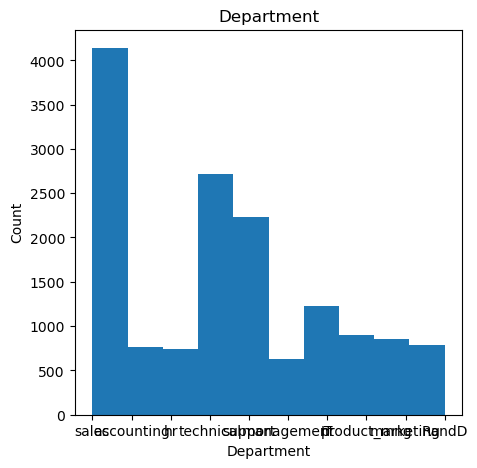

In [22]:
#checking Department

plt.hist(hr_data['Department'])
plt.xlabel('Department')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,8)
plt.title('Department')
plt.show()

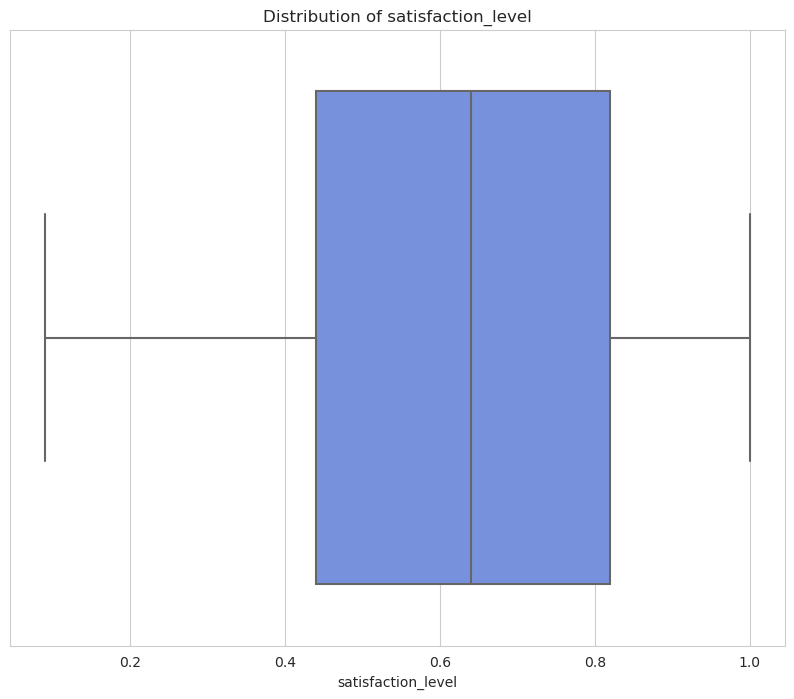

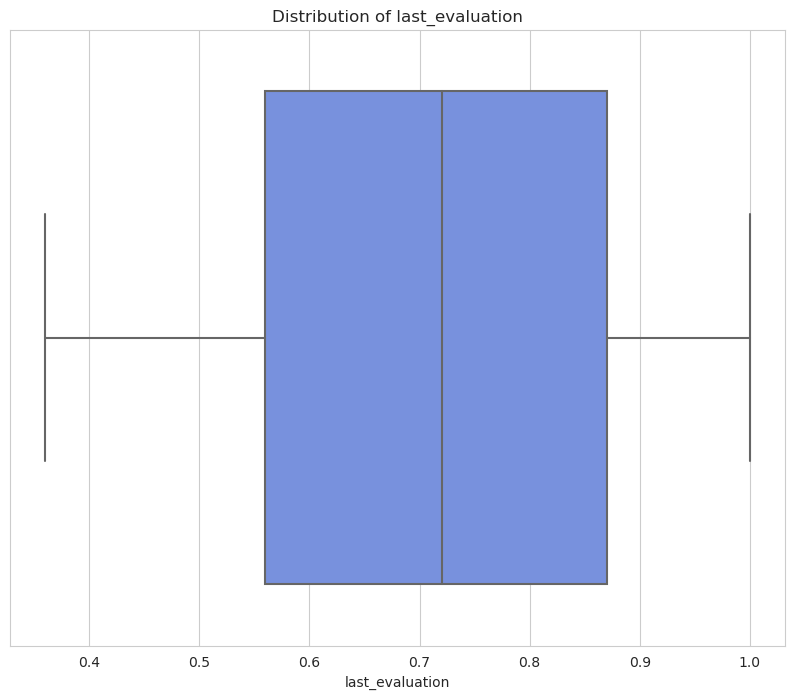

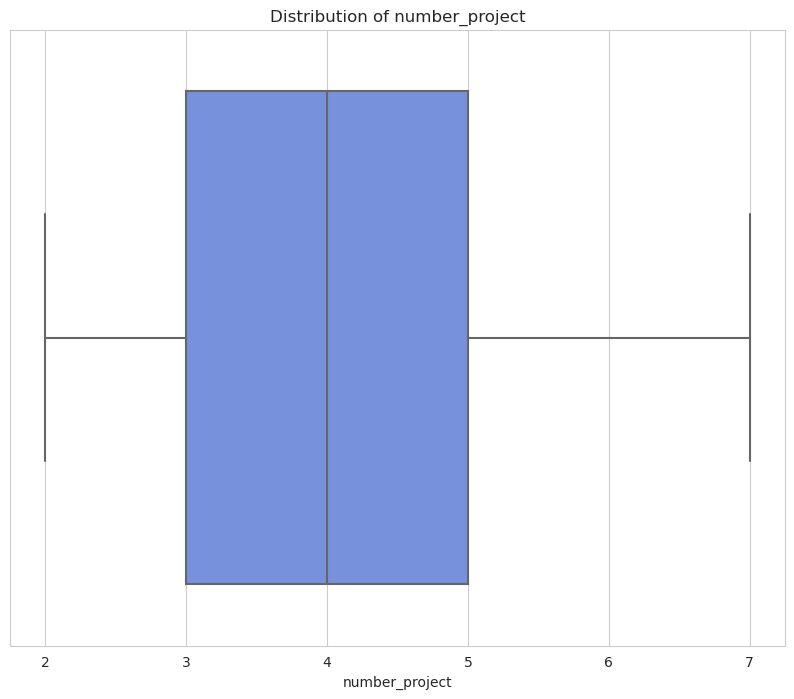

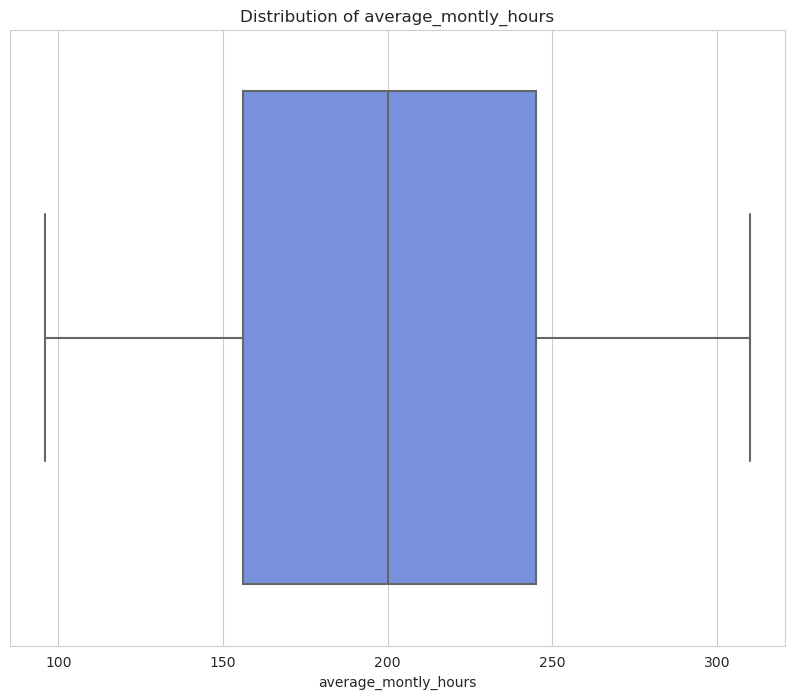

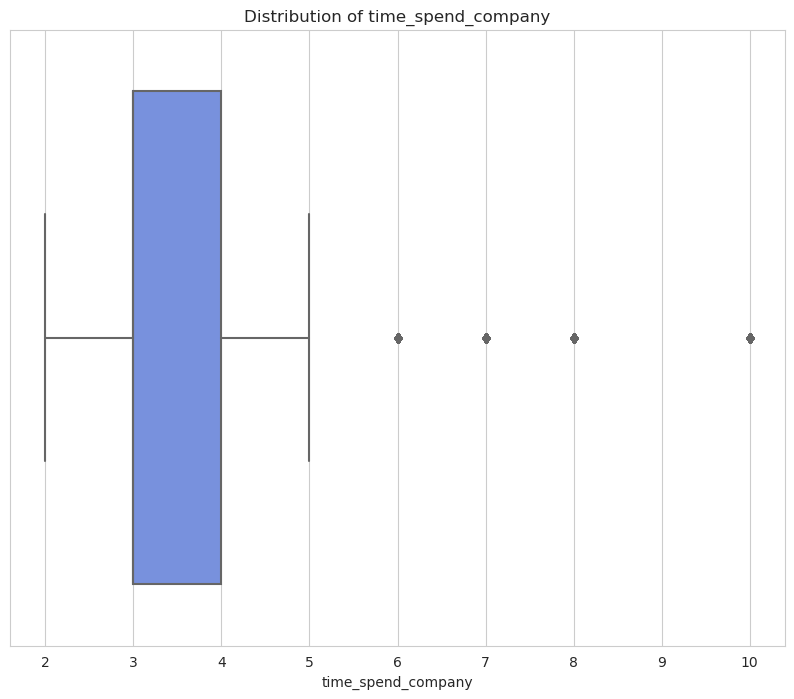

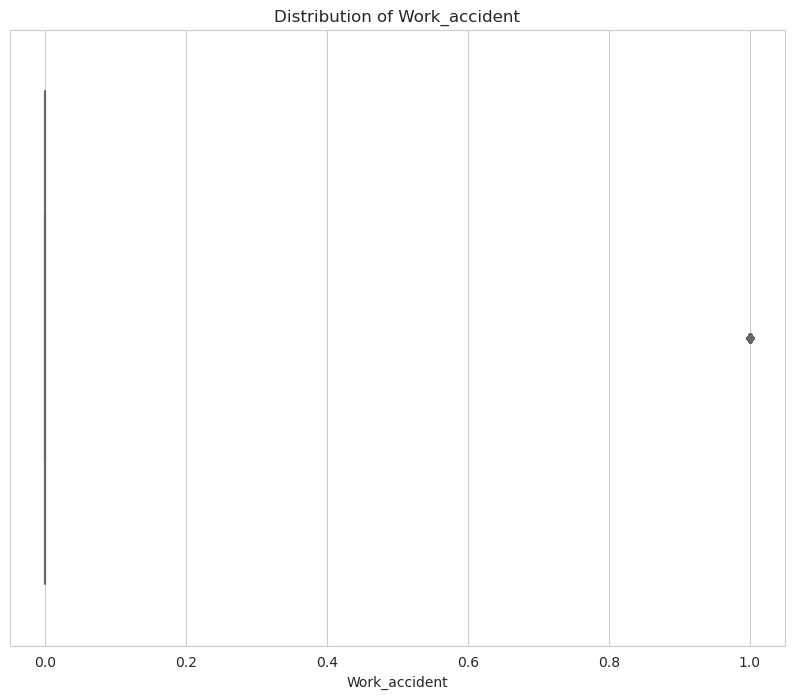

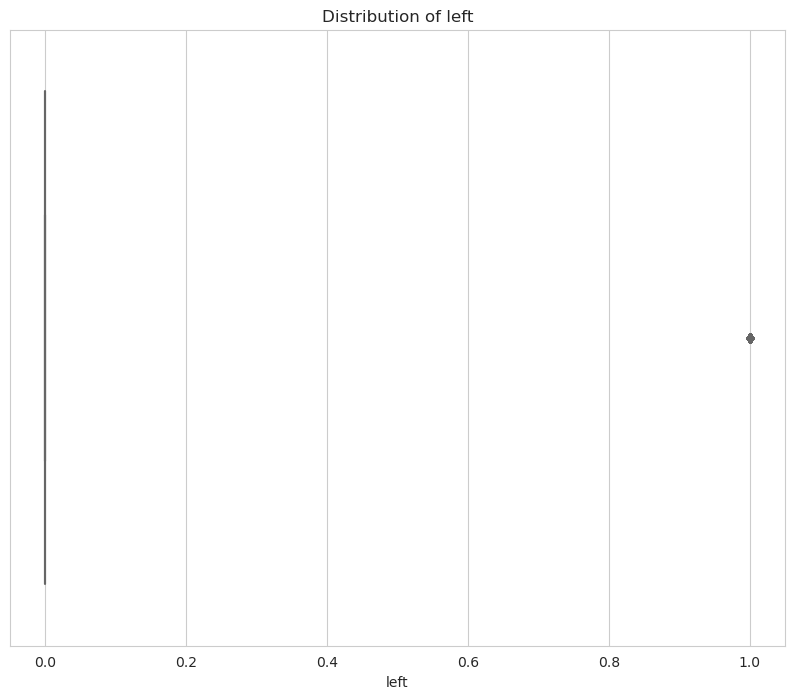

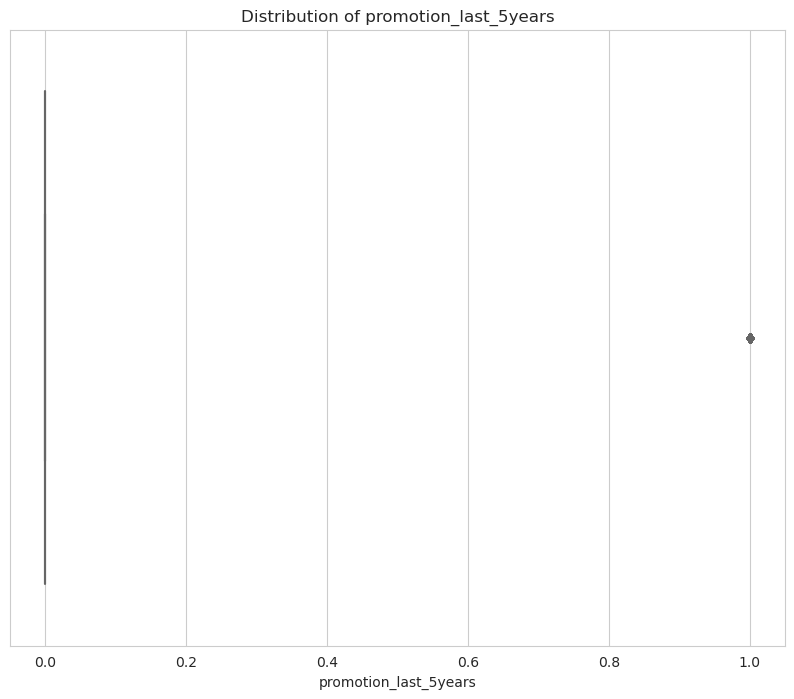

In [23]:
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

for i in hr_data.columns:
  if hr_data[i].dtype != 'O':
    sns.boxplot(x =  hr_data[i])
    plt.title('Distribution of '+i)
    plt.show()

# **Encoding**

In [24]:
def onehot_encode(hr_data, column, prefix):
    hr_data = hr_data.copy()
    dummies = pd.get_dummies(hr_data[column], prefix=prefix)
    hr_data = pd.concat([hr_data, dummies], axis=1)
    hr_data = hr_data.drop(column, axis=1)
    return hr_data

In [25]:
# converting textual columns to numeric

char_cols = hr_data.dtypes.pipe(lambda x: x[x== 'object']).index
label_mapping = {}

for c in char_cols:
    hr_data[c], label_mapping[c] = pd.factorize(hr_data[c])
    
    
hr_data
    

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,4
14995,0.37,0.48,2,160,3,0,1,0,4
14996,0.37,0.53,2,143,3,0,1,0,4
14997,0.11,0.96,6,280,4,0,1,0,4


<AxesSubplot:>

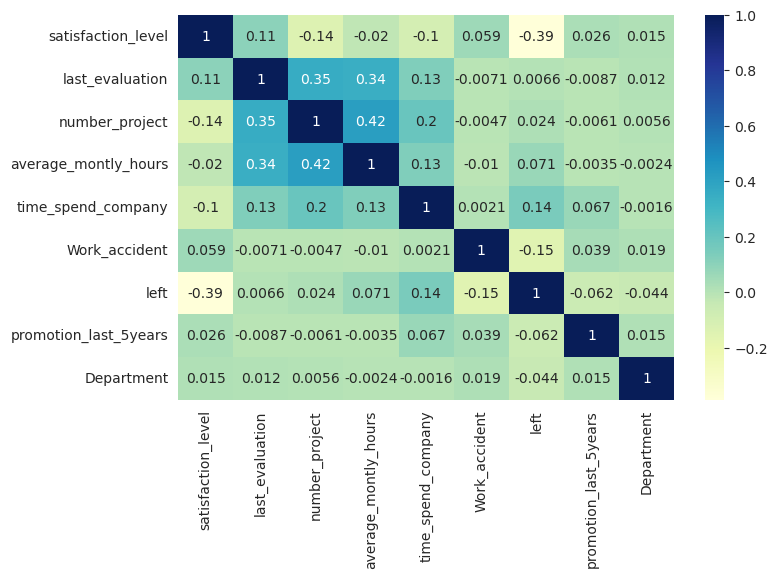

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(hr_data.corr(),cmap="YlGnBu",annot=True)

# **Splitting data into train set and test set**

In [27]:
# normalize the data


scaler=StandardScaler()
df = scaler.fit_transform(hr_data.values)

#split the data
x_train, x_test, y_train, y_test = train_test_split (hr_data, target )






In [28]:
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression( solver='lbfgs', max_iter=6000),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier(),
    "         Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

   K-Nearest Neighbors trained.
   Logistic Regression trained.
Support Vector Machine trained.
         Decision Tree trained.
        Neural Network trained.
         Random Forest trained.


In [29]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    
    report=classification_report(y_test, y_pred)
    print(report)

   K-Nearest Neighbors Accuracy: 51.20%
[[  36  169   88]
 [  83 1142  567]
 [  89  834  742]]
              precision    recall  f1-score   support

        high       0.17      0.12      0.14       293
         low       0.53      0.64      0.58      1792
      medium       0.53      0.45      0.48      1665

    accuracy                           0.51      3750
   macro avg       0.41      0.40      0.40      3750
weighted avg       0.50      0.51      0.50      3750

   Logistic Regression Accuracy: 48.99%
[[   0  170  123]
 [   0 1410  382]
 [   0 1238  427]]
              precision    recall  f1-score   support

        high       0.00      0.00      0.00       293
         low       0.50      0.79      0.61      1792
      medium       0.46      0.26      0.33      1665

    accuracy                           0.49      3750
   macro avg       0.32      0.35      0.31      3750
weighted avg       0.44      0.49      0.44      3750



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine Accuracy: 47.79%
[[   0  293    0]
 [   0 1792    0]
 [   0 1665    0]]
              precision    recall  f1-score   support

        high       0.00      0.00      0.00       293
         low       0.48      1.00      0.65      1792
      medium       0.00      0.00      0.00      1665

    accuracy                           0.48      3750
   macro avg       0.16      0.33      0.22      3750
weighted avg       0.23      0.48      0.31      3750

         Decision Tree Accuracy: 58.83%
[[ 109   98   86]
 [ 111 1134  547]
 [ 140  562  963]]
              precision    recall  f1-score   support

        high       0.30      0.37      0.33       293
         low       0.63      0.63      0.63      1792
      medium       0.60      0.58      0.59      1665

    accuracy                           0.59      3750
   macro avg       0.51      0.53      0.52      3750
weighted avg       0.59      0.59      0.59      3750

        Neural Network Accuracy: 48.85%


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[   0   62  231]
 [   0  725 1067]
 [   0  558 1107]]
              precision    recall  f1-score   support

        high       0.00      0.00      0.00       293
         low       0.54      0.40      0.46      1792
      medium       0.46      0.66      0.54      1665

    accuracy                           0.49      3750
   macro avg       0.33      0.36      0.34      3750
weighted avg       0.46      0.49      0.46      3750



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


         Random Forest Accuracy: 61.41%
[[  93  125   75]
 [  10 1256  526]
 [   9  702  954]]
              precision    recall  f1-score   support

        high       0.83      0.32      0.46       293
         low       0.60      0.70      0.65      1792
      medium       0.61      0.57      0.59      1665

    accuracy                           0.61      3750
   macro avg       0.68      0.53      0.57      3750
weighted avg       0.63      0.61      0.61      3750

